In [48]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import time
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [49]:
os.getcwd()

'C:\\Users\\ABC\\Documents\\IBM AI 6th sem\\1. Supervised ML\\12. Logistic Regression'

In [50]:
x = pd.read_csv("mnist_x.csv")
y = pd.read_csv("mnist_y.csv",header=None)

In [51]:
x.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [52]:
y.head()

,0
0,0
1,1
2,2
3,3
4,4


In [53]:
x/=255

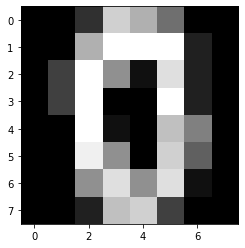

In [56]:
plt.imshow(np.array(x.iloc[20]).reshape(8,8),cmap='gray')

In [65]:
np.array(y.iloc[20])

array([0], dtype=int64)

In [57]:
print(type(x))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [58]:
print(x.shape)
print(y.shape)

(1797, 64)
(1797, 1)


In [59]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=200)

In [36]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1437, 64)
(1437, 1)
(360, 64)
(360, 1)


In [67]:
from sklearn.model_selection import GridSearchCV

In [68]:
np.random.seed(200)
clf=LogisticRegression(multi_class='ovr',solver='lbfgs',penalty='l2')
mod=GridSearchCV(clf,param_grid={"C":np.random.uniform(1,120,2)})
mod.fit(x_train,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='ovr',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([113.76823857,  27.95914311])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [71]:
y_pred = mod.predict(x_test)

In [72]:
y_pred

array([5, 4, 2, 7, 7, 5, 2, 3, 1, 2, 2, 3, 9, 0, 9, 9, 0, 8, 8, 2, 4, 6,
       0, 4, 7, 4, 8, 9, 5, 6, 7, 1, 2, 1, 5, 0, 3, 0, 4, 4, 8, 9, 0, 8,
       4, 6, 0, 3, 3, 8, 6, 8, 0, 2, 9, 1, 3, 5, 4, 0, 2, 0, 8, 9, 6, 1,
       2, 4, 9, 0, 5, 0, 2, 9, 6, 2, 6, 7, 8, 5, 8, 7, 9, 6, 5, 8, 2, 8,
       1, 3, 3, 7, 6, 2, 3, 0, 7, 0, 7, 7, 3, 3, 6, 4, 8, 0, 4, 0, 5, 7,
       2, 8, 3, 6, 1, 0, 4, 0, 0, 6, 1, 0, 9, 3, 1, 6, 7, 5, 9, 4, 7, 1,
       6, 8, 9, 2, 2, 9, 8, 5, 7, 9, 2, 5, 8, 5, 7, 5, 6, 9, 4, 1, 2, 7,
       5, 9, 4, 6, 8, 7, 0, 1, 3, 7, 0, 7, 1, 0, 3, 6, 3, 6, 5, 3, 0, 4,
       3, 0, 1, 2, 5, 3, 7, 2, 1, 9, 3, 5, 0, 7, 6, 5, 0, 2, 5, 4, 8, 3,
       4, 6, 3, 1, 6, 1, 8, 1, 9, 8, 5, 7, 1, 3, 4, 6, 4, 2, 1, 0, 3, 8,
       0, 9, 6, 8, 8, 2, 4, 3, 5, 0, 4, 4, 1, 4, 1, 9, 5, 9, 1, 8, 0, 8,
       9, 4, 9, 3, 6, 4, 1, 0, 3, 5, 8, 1, 2, 6, 9, 4, 6, 9, 1, 5, 1, 1,
       9, 8, 8, 2, 4, 6, 5, 9, 1, 4, 4, 5, 9, 8, 2, 2, 1, 7, 0, 9, 3, 5,
       6, 0, 8, 7, 8, 9, 5, 7, 3, 6, 1, 5, 9, 8, 7,

In [74]:
confusion_matrix(y_test,y_pred)

array([[36,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 38,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  0, 33,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0, 31,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 36,  0,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0, 35,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 35,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 32,  0,  0],
       [ 0,  1,  0,  1,  0,  0,  1,  0, 37,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  1, 35]], dtype=int64)

In [75]:
accuracy_score(y_test,y_pred)

0.9666666666666667

In [76]:
mod.best_params_

{'C': 113.76823856534877}

In [78]:
mod.best_estimator_

LogisticRegression(C=113.76823856534877, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)